In [1]:
# SEEMA分析流程：
# 樣本（Sample）：選擇和抽樣數據集，以建立分析所需的樣本。
# 探索（Explore）：對數據進行初步探索性分析，以了解數據的特性和模式。
# 修改（Modify）：根據探索結果，對數據進行清理、轉換和準備。
# 建模（Model）：選擇合適的建模技術，並訓練模型。
# 評估（Assess）：評估模型的性能，確保達到分析目標。

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy

In [2]:
# 這個block可以不用看，因為沒有用到

# 幹沒辦法直接從網路抓資料，好像要參加比賽才有權限這樣玩；只能自己下載
# import os
# from kaggle.api.kaggle_api_extended import KaggleApi

# # 設置 Kaggle API 密鑰
# os.environ["KAGGLE_USERNAME"] = "weeiili"
# os.environ["KAGGLE_KEY"] = "fb4bed5a2226ec0ab7c6c1ea985b7cb4"

# # 初始化 Kaggle API 客戶端
# api = KaggleApi()
# api.authenticate()

# # 下載數據集
# api.dataset_download_files(dataset="903124/MLB Statcast data", path="C:/Users/zv750/Desktop/BDA_FINAL", unzip=True)

In [3]:
# 讀資料：樣本(sample)

full_data = pd.read_csv("C:/Users/zv750/Desktop/BDA_FINAL/Statcast_2021.csv", keep_default_na = True)
# full_data.head(3) # 叫出前三筆資料的各個欄位

In [4]:
# 印出欄位名稱、有值的數量、變數型態
# full_data.info(verbose=True)

In [5]:
# 探索(explore)：觀察下載下來的每一資料欄位(屬性)分別都是甚麼類性的資料

# 比如說：pitch-name(球種名稱)：categorical => 4-Seam Fastball、Slider、Cutter...
#        release_speed(球剛從投手守中離手時的速度)：連續的正實數 => 95.2(mph)、73.3(mph)

In [6]:
# 修改(modify)、特徵選取：選出可能的有關的欄位(因子)

# on_base = full_data[['on_3b', 'on_2b', 'on_1b']]
RawAttr_PitchEnvironment = full_data[['at_bat_number', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'pitch_name', 'home_score', 'away_score', 'if_fielding_alignment']]
# print(RawAttr_PitchEnvironment.info(), "\n", RawAttr_PitchEnvironment.head(10))

In [7]:
# 查看各欄位缺失的情形
RawAttr_PitchEnvironment.isnull().sum()

at_bat_number                 0
balls                         0
strikes                       0
on_3b                    642940
on_2b                    575368
on_1b                    490712
outs_when_up                  0
inning                        0
inning_topbot                 0
pitch_name                  365
home_score                    0
away_score                    0
if_fielding_alignment      3589
dtype: int64

In [8]:
# 修改(modify)、特徵工程：清除缺失值(舉例上個block中，原始資料中存有pitch_name缺失的row，這些就沒辦法進行分析，所以刪除)

# DataFrame.loc[row_label(s), column_label(s)]
# => row_label(s) 可以是單個標籤，例如整數索引或行標籤的名稱，也可以是一個布爾Series，用於選擇符合條件的行。如果使用布爾Series，則只保留對應的True行。
# => column_label(s) 可以是單個標籤，例如列的名稱，也可以是列標籤的列表，用於選擇多個列。如果省略 column_label(s)，則會選擇所有列。
RawAttr_PitchEnvironment = RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['pitch_name'].isnull() == False, :]
RawAttr_PitchEnvironment = RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['if_fielding_alignment'].isnull() == False, :]
RawAttr_PitchEnvironment.isnull().sum()

at_bat_number                 0
balls                         0
strikes                       0
on_3b                    639735
on_2b                    572682
on_1b                    488339
outs_when_up                  0
inning                        0
inning_topbot                 0
pitch_name                    0
home_score                    0
away_score                    0
if_fielding_alignment         0
dtype: int64

In [9]:
# 修改(modify)、特徵工程：補值；說明如下：

# 原 on_3b, on_2b, on_1b 只有在那個壘包上有人時，才會記錄下該壘包上的跑者的編號；若沒有跑者在該壘包上，就會空著該儲存格。
# 現在全部都補0，表示沒有人，原有值的部分則是球員編號
RawAttr_PitchEnvironment.fillna(0, inplace = True)
RawAttr_PitchEnvironment.isnull().sum()
# RawAttr_PitchEnvironment.head(10)

at_bat_number            0
balls                    0
strikes                  0
on_3b                    0
on_2b                    0
on_1b                    0
outs_when_up             0
inning                   0
inning_topbot            0
pitch_name               0
home_score               0
away_score               0
if_fielding_alignment    0
dtype: int64

In [10]:
# 修改(modify)、特徵工程：改值

# 把on_3b, on_2b, on_1b都改成true、fasle
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_1b'] > 0, 'on_1b'] = True
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_1b'] == 0, 'on_1b'] = False
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_2b'] > 0, 'on_2b'] = True
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_2b'] == 0, 'on_2b'] = False
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_3b'] > 0, 'on_3b'] = True
RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['on_3b'] == 0, 'on_3b'] = False
RawAttr_PitchEnvironment.head(10)

,at_bat_number,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_name,home_score,away_score,if_fielding_alignment
0,61,1,2,False,False,False,2,9,Top,4-Seam Fastball,5,0,Infield shift
1,61,1,1,False,False,False,2,9,Top,Slider,5,0,Infield shift
2,61,1,0,False,False,False,2,9,Top,Curveball,5,0,Infield shift
3,61,0,0,False,False,False,2,9,Top,Curveball,5,0,Standard
4,60,1,0,False,False,False,1,9,Top,4-Seam Fastball,5,0,Standard
5,60,0,0,False,False,False,1,9,Top,4-Seam Fastball,5,0,Standard
6,59,0,2,False,False,False,0,9,Top,Slider,5,0,Standard
7,59,0,1,False,False,False,0,9,Top,Slider,5,0,Standard
8,59,0,0,False,False,False,0,9,Top,4-Seam Fastball,5,0,Standard
9,58,0,2,False,False,False,2,8,Bot,Sinker,5,0,Infield shift


In [11]:
print(RawAttr_PitchEnvironment['on_1b'].value_counts())
print(RawAttr_PitchEnvironment['on_2b'].value_counts())
print(RawAttr_PitchEnvironment['on_3b'].value_counts())

on_1b
False    488339
True     217920
Name: count, dtype: int64
on_2b
False    572682
True     133577
Name: count, dtype: int64
on_3b
False    639735
True      66524
Name: count, dtype: int64


In [12]:
RawAttr_PitchEnvironment.describe()

,at_bat_number,balls,strikes,outs_when_up,inning,home_score,away_score
count,706259.000000,706259.000000,706259.000000,706259.000000,706259.000000,706259.000000,706259.000000
mean,38.398566,0.883563,0.895329,0.976806,4.923334,2.234236,2.316087
std,22.481027,0.968423,0.828381,0.818492,2.586550,2.605849,2.630172
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,38.000000,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000
75%,57.000000,2.000000,2.000000,2.000000,7.000000,3.000000,4.000000
max,125.000000,4.000000,2.000000,2.000000,16.000000,22.000000,24.000000


In [13]:
# 修改(modify)、特徵工程：刪除異常值；如上一block中，語法"RawAttr_PitchEnvironment.describe()"所show的表格所示：
#                       'balls'有點怪怪的，不該有4顆，因為本次所使用的資料是紀錄"幾好球幾壞球時，投手所投出的球路的的狀況及後續的結果；
#                       因此照理講，不該出現當下有4壞球時，接下來的下一球的紀錄情形(因為4壞球早該保送上壘了，不會有下一球!)

RawAttr_PitchEnvironment = RawAttr_PitchEnvironment.loc[RawAttr_PitchEnvironment['balls'] != 4, :]
RawAttr_PitchEnvironment['balls'].value_counts()

balls
0    318690
1    209508
2    119668
3     58392
Name: count, dtype: int64

In [14]:
# # Example 1: Add Column using arithmetic operation
# # Based on existing column 
# df["Final_Fee"] = df["Fee"] - df["Discount"]

# # Example 2: Add New Column using assign()
# df = pd.DataFrame(technologies)
# df1 = df.assign(Discount_Percent=lambda x: x.Discount / x.Fee * 100)

# # Example 3: Add column using np.where()
# df['Discount_rating'] = np.where(df['Discount'] > 2000, 'Good', 'Bad')

# # Example 4: Add column using apply()
# df['Final_fee'] = df.apply(lambda x: x['Fee'] - x['Discount'], axis=1)

# # Example 5: Add column to DataFrame using loc[]
# df['Without_discount'] = df.loc[:,['Fee', 'Discount']].sum(axis=1)

In [15]:
# 修改(modify)、特徵工程：增加新attribute

tidied_data = copy.deepcopy(RawAttr_PitchEnvironment)
tidied_data['HomeLead'] = np.where(tidied_data['home_score'] > tidied_data['away_score'], True, False)
tidied_data['AwayLead'] = np.where(tidied_data['home_score'] < tidied_data['away_score'], True, False)
tidied_data['tie_condition'] = np.where(tidied_data['home_score'] == tidied_data['away_score'], True, False)
# tidied_data.head(5)

In [16]:
# 修改(modify)、特徵工程：增加新attribute

tidied_data['HomeLeadByLessThan4'] = np.where((tidied_data['home_score'] - tidied_data['away_score'] <= 4) & (tidied_data['HomeLead']), True, False)
tidied_data['AwayLeadByLessThan4'] = np.where((tidied_data['away_score'] - tidied_data['home_score'] <= 4) & (tidied_data['AwayLead']), True, False)
tidied_data['Total_LeadByLessThan4'] = np.where((tidied_data['HomeLeadByLessThan4'] == True) | (tidied_data['AwayLeadByLessThan4'] == True), True, False)
tidied_data['Total_LeadByLessThan4'].value_counts()

Total_LeadByLessThan4
True     416628
False    289630
Name: count, dtype: int64

In [17]:
# 修改(modify)、特徵工程：篩選出所設定的情境的資料筆數

Total_LeadByLessThan4 = copy.deepcopy(tidied_data)
Total_LeadByLessThan4 = Total_LeadByLessThan4.loc[Total_LeadByLessThan4['Total_LeadByLessThan4'] == True]
Total_LeadByLessThan4.head(5)

,at_bat_number,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_name,home_score,away_score,if_fielding_alignment,HomeLead,AwayLead,tie_condition,HomeLeadByLessThan4,AwayLeadByLessThan4,Total_LeadByLessThan4
137,24,0,0,False,True,False,2,3,Bot,Slider,4,0,Infield shift,True,False,False,True,False,True
138,23,0,2,False,True,False,2,3,Bot,Slider,3,0,Standard,True,False,False,True,False,True
139,23,0,2,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True
140,23,0,1,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True
141,23,0,0,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True


In [18]:
Total_LeadByLessThan4['pitch_name'].unique()

array(['Slider', '4-Seam Fastball', 'Sinker', 'Curveball', 'Changeup',
       'Cutter', 'Knuckle Curve', 'Split-Finger', 'Fastball', 'Eephus'],
      dtype=object)

In [19]:
# 修改(modify)、特徵工程：增加新attribute

Total_LeadByLessThan4['if_fastball'] = np.where((Total_LeadByLessThan4['pitch_name'] == '4-Seam Fastball') | (Total_LeadByLessThan4['pitch_name'] == 'Fastball'), 1, 0)
Total_LeadByLessThan4.head(5)

,at_bat_number,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,pitch_name,home_score,away_score,if_fielding_alignment,HomeLead,AwayLead,tie_condition,HomeLeadByLessThan4,AwayLeadByLessThan4,Total_LeadByLessThan4,if_fastball
137,24,0,0,False,True,False,2,3,Bot,Slider,4,0,Infield shift,True,False,False,True,False,True,0
138,23,0,2,False,True,False,2,3,Bot,Slider,3,0,Standard,True,False,False,True,False,True,0
139,23,0,2,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True,1
140,23,0,1,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True,1
141,23,0,0,False,True,False,2,3,Bot,4-Seam Fastball,3,0,Standard,True,False,False,True,False,True,1


In [20]:
Total_LeadByLessThan4.describe()

,at_bat_number,balls,strikes,outs_when_up,inning,home_score,away_score,if_fastball
count,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000
mean,40.662850,0.883865,0.894275,0.992266,5.205812,2.250691,2.342178,0.345826
std,19.989119,0.969019,0.828009,0.818625,2.378850,2.050632,2.027149,0.475638
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000
50%,40.000000,1.000000,1.000000,1.000000,5.000000,2.000000,2.000000,0.000000
75%,57.000000,2.000000,2.000000,2.000000,7.000000,3.000000,4.000000,1.000000
max,125.000000,3.000000,2.000000,2.000000,16.000000,17.000000,17.000000,1.000000


In [21]:
Total_LeadByLessThan4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416628 entries, 137 to 709783
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   at_bat_number          416628 non-null  int64 
 1   balls                  416628 non-null  int64 
 2   strikes                416628 non-null  int64 
 3   on_3b                  416628 non-null  object
 4   on_2b                  416628 non-null  object
 5   on_1b                  416628 non-null  object
 6   outs_when_up           416628 non-null  int64 
 7   inning                 416628 non-null  int64 
 8   inning_topbot          416628 non-null  object
 9   pitch_name             416628 non-null  object
 10  home_score             416628 non-null  int64 
 11  away_score             416628 non-null  int64 
 12  if_fielding_alignment  416628 non-null  object
 13  HomeLead               416628 non-null  bool  
 14  AwayLead               416628 non-null  bool  
 15  tie

In [22]:
# 修改(modify)、特徵工程：選出所需的欄位(會持續的有這樣的"新增"、"篩選"的動作，因為raw attribute可能不適合直接做分析)

# at_bat_number, balls, strikes, on_3b, on_2b, on_1b, outs_when_up, inning, inning_topbot, pitch_name, home_score, away_score, 
# if_fielding_alignment, HomeLead, AwayLead, tie_condition, HomeLeadByLessThan4, AwayLeadByLessThan4, 
# Total_LeadByLessThan4, if_fastball
simplified_TLBLT4 = Total_LeadByLessThan4[['at_bat_number', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'if_fastball', 'if_fielding_alignment']]
simplified_TLBLT4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416628 entries, 137 to 709783
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   at_bat_number          416628 non-null  int64 
 1   balls                  416628 non-null  int64 
 2   strikes                416628 non-null  int64 
 3   on_3b                  416628 non-null  object
 4   on_2b                  416628 non-null  object
 5   on_1b                  416628 non-null  object
 6   outs_when_up           416628 non-null  int64 
 7   inning                 416628 non-null  int64 
 8   if_fastball            416628 non-null  int32 
 9   if_fielding_alignment  416628 non-null  object
dtypes: int32(1), int64(5), object(4)
memory usage: 33.4+ MB


In [23]:
# 修改(modify)、特徵工程：增加新attribute

# 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'if_fastball', 'if_fielding_alignment'
# (balls, strikes), (on_3b, on_2b, on_1b), outs_when_up, inning, if_fielding_alignment
new_TLBLT4 = copy.deepcopy(simplified_TLBLT4)
new_TLBLT4['0-0'] = np.where((new_TLBLT4['balls'] == 0) & (new_TLBLT4['strikes'] == 0), 1, 0)
new_TLBLT4['1-0'] = np.where((new_TLBLT4['balls'] == 1) & (new_TLBLT4['strikes'] == 0), 1, 0)
new_TLBLT4['2-0'] = np.where((new_TLBLT4['balls'] == 2) & (new_TLBLT4['strikes'] == 0), 1, 0)
new_TLBLT4['3-0'] = np.where((new_TLBLT4['balls'] == 3) & (new_TLBLT4['strikes'] == 0), 1, 0)
new_TLBLT4['0-1'] = np.where((new_TLBLT4['balls'] == 0) & (new_TLBLT4['strikes'] == 1), 1, 0)
new_TLBLT4['1-1'] = np.where((new_TLBLT4['balls'] == 1) & (new_TLBLT4['strikes'] == 1), 1, 0)
new_TLBLT4['2-1'] = np.where((new_TLBLT4['balls'] == 2) & (new_TLBLT4['strikes'] == 1), 1, 0)
new_TLBLT4['3-1'] = np.where((new_TLBLT4['balls'] == 3) & (new_TLBLT4['strikes'] == 1), 1, 0)
new_TLBLT4['0-2'] = np.where((new_TLBLT4['balls'] == 0) & (new_TLBLT4['strikes'] == 2), 1, 0)
new_TLBLT4['1-2'] = np.where((new_TLBLT4['balls'] == 1) & (new_TLBLT4['strikes'] == 2), 1, 0)
new_TLBLT4['2-2'] = np.where((new_TLBLT4['balls'] == 2) & (new_TLBLT4['strikes'] == 2), 1, 0)
new_TLBLT4['3-2'] = np.where((new_TLBLT4['balls'] == 3) & (new_TLBLT4['strikes'] == 2), 1, 0)
new_TLBLT4.describe()

,at_bat_number,balls,strikes,outs_when_up,inning,if_fastball,0-0,1-0,2-0,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2
count,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000,416628.000000
mean,40.662850,0.883865,0.894275,0.992266,5.205812,0.345826,0.256149,0.100132,0.034206,0.010763,0.127548,0.100749,0.052795,0.022132,0.067629,0.095584,0.082224,0.050088
std,19.989119,0.969019,0.828009,0.818625,2.378850,0.475638,0.436506,0.300177,0.181757,0.103183,0.333586,0.300997,0.223625,0.147114,0.251108,0.294020,0.274707,0.218126
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,2.000000,2.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,125.000000,3.000000,2.000000,2.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# 修改(modify)、特徵工程：刪除用不到的attribute

new_TLBLT4 = new_TLBLT4.drop(columns=['balls', 'strikes'])   # axis=1 表示要刪掉的是"直行"、attribute
new_TLBLT4.head(3)

,at_bat_number,on_3b,on_2b,on_1b,outs_when_up,inning,if_fastball,if_fielding_alignment,0-0,1-0,2-0,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2
137,24,False,True,False,2,3,0,Infield shift,1,0,0,0,0,0,0,0,0,0,0,0
138,23,False,True,False,2,3,0,Standard,0,0,0,0,0,0,0,0,1,0,0,0
139,23,False,True,False,2,3,1,Standard,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
# 修改(modify)、特徵工程：增加新attribute

new_TLBLT4['RISP'] = np.where((new_TLBLT4['on_2b'] == True) | (new_TLBLT4['on_3b'] == True), 1, 0)
new_TLBLT4.head(5)

,at_bat_number,on_3b,on_2b,on_1b,outs_when_up,inning,if_fastball,if_fielding_alignment,0-0,1-0,...,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2,RISP
137,24,False,True,False,2,3,0,Infield shift,1,0,...,0,0,0,0,0,0,0,0,0,1
138,23,False,True,False,2,3,0,Standard,0,0,...,0,0,0,0,0,1,0,0,0,1
139,23,False,True,False,2,3,1,Standard,0,0,...,0,0,0,0,0,1,0,0,0,1
140,23,False,True,False,2,3,1,Standard,0,0,...,0,1,0,0,0,0,0,0,0,1
141,23,False,True,False,2,3,1,Standard,1,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
new_TLBLT4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416628 entries, 137 to 709783
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   at_bat_number          416628 non-null  int64 
 1   on_3b                  416628 non-null  object
 2   on_2b                  416628 non-null  object
 3   on_1b                  416628 non-null  object
 4   outs_when_up           416628 non-null  int64 
 5   inning                 416628 non-null  int64 
 6   if_fastball            416628 non-null  int32 
 7   if_fielding_alignment  416628 non-null  object
 8   0-0                    416628 non-null  int32 
 9   1-0                    416628 non-null  int32 
 10  2-0                    416628 non-null  int32 
 11  3-0                    416628 non-null  int32 
 12  0-1                    416628 non-null  int32 
 13  1-1                    416628 non-null  int32 
 14  2-1                    416628 non-null  int32 
 15  3-1

In [27]:
# 修改(modify)、特徵工程：刪除attribute

Nnew_TLBLT4 = copy.deepcopy(new_TLBLT4)
del Nnew_TLBLT4['RISP']
Nnew_TLBLT4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416628 entries, 137 to 709783
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   at_bat_number          416628 non-null  int64 
 1   on_3b                  416628 non-null  object
 2   on_2b                  416628 non-null  object
 3   on_1b                  416628 non-null  object
 4   outs_when_up           416628 non-null  int64 
 5   inning                 416628 non-null  int64 
 6   if_fastball            416628 non-null  int32 
 7   if_fielding_alignment  416628 non-null  object
 8   0-0                    416628 non-null  int32 
 9   1-0                    416628 non-null  int32 
 10  2-0                    416628 non-null  int32 
 11  3-0                    416628 non-null  int32 
 12  0-1                    416628 non-null  int32 
 13  1-1                    416628 non-null  int32 
 14  2-1                    416628 non-null  int32 
 15  3-1

In [28]:
# 修改(modify)、特徵工程：增加新attribute

Nnew_TLBLT4['if_fielding_alignment'] = np.where(Nnew_TLBLT4['if_fielding_alignment'] != 'Standard', True, False)
Nnew_TLBLT4.head(10)

,at_bat_number,on_3b,on_2b,on_1b,outs_when_up,inning,if_fastball,if_fielding_alignment,0-0,1-0,2-0,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2
137,24,False,True,False,2,3,0,True,1,0,0,0,0,0,0,0,0,0,0,0
138,23,False,True,False,2,3,0,False,0,0,0,0,0,0,0,0,1,0,0,0
139,23,False,True,False,2,3,1,False,0,0,0,0,0,0,0,0,1,0,0,0
140,23,False,True,False,2,3,1,False,0,0,0,0,1,0,0,0,0,0,0,0
141,23,False,True,False,2,3,1,False,1,0,0,0,0,0,0,0,0,0,0,0
142,22,True,False,True,1,3,1,True,0,0,0,0,0,0,0,0,1,0,0,0
143,22,True,False,True,1,3,1,True,0,0,0,0,1,0,0,0,0,0,0,0
144,22,True,False,True,1,3,1,True,1,0,0,0,0,0,0,0,0,0,0,0
145,21,False,False,True,1,3,1,True,0,0,0,0,1,0,0,0,0,0,0,0
146,21,False,False,True,1,3,1,True,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# 樣本(sample)：個別將"不同好壞球數"的資料分開來，以便後續做不同的情境的預測

zero_zero = Nnew_TLBLT4.loc[new_TLBLT4['0-0'] == 1, :]
one_zero = Nnew_TLBLT4.loc[new_TLBLT4['1-0'] == 1, :]
two_zero = Nnew_TLBLT4.loc[new_TLBLT4['2-0'] == 1, :]
three_zero = Nnew_TLBLT4.loc[new_TLBLT4['3-0'] == 1, :]
zero_one = Nnew_TLBLT4.loc[new_TLBLT4['0-1'] == 1, :]
one_one = Nnew_TLBLT4.loc[new_TLBLT4['1-1'] == 1, :]
two_one = Nnew_TLBLT4.loc[new_TLBLT4['2-1'] == 1, :]
three_one = Nnew_TLBLT4.loc[new_TLBLT4['3-1'] == 1, :]
zero_two = Nnew_TLBLT4.loc[new_TLBLT4['0-2'] == 1, :]
one_two = Nnew_TLBLT4.loc[new_TLBLT4['1-2'] == 1, :]
two_two = Nnew_TLBLT4.loc[new_TLBLT4['2-2'] == 1, :]
three_two = Nnew_TLBLT4.loc[new_TLBLT4['3-2'] == 1, :]

In [30]:
all_counts = ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2']
columns_to_be_drop = [[each for i, each in enumerate(all_counts) if i != j] for j in range(len(all_counts))]
columns_to_be_drop

[['1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '3-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '0-2', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '1-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '2-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '3-2'],
 ['0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2']]

In [31]:
pd_df = [zero_zero, one_zero, two_zero, three_zero, zero_one, one_one, two_one, three_one, zero_two, one_two, two_two, three_two]
for i, each_del_col_list in enumerate(columns_to_be_drop):
    for each_del_col in each_del_col_list:
        del pd_df[i][each_del_col]

In [32]:
three_one.head(10)

,at_bat_number,on_3b,on_2b,on_1b,outs_when_up,inning,if_fastball,if_fielding_alignment,3-1
150,20,False,False,False,1,3,1,True,1
315,57,False,True,False,2,7,1,False,1
394,39,False,False,False,1,5,1,False,1
409,34,False,False,True,0,5,1,False,1
445,25,False,False,False,2,3,1,True,1
465,22,False,False,False,2,3,1,True,1
482,18,False,False,False,2,2,1,True,1
490,17,False,False,False,1,2,1,True,1
880,64,False,True,False,0,8,1,False,1
946,44,False,False,False,2,5,1,False,1


In [33]:
for i, each_df in enumerate(pd_df):
    print(all_counts[i], ":\n")
    print(each_df['if_fastball'].value_counts())
    print("\n\n=====\n\n")

0-0 :

if_fastball
0    69500
1    37219
Name: count, dtype: int64


=====


1-0 :

if_fastball
0    27301
1    14417
Name: count, dtype: int64


=====


2-0 :

if_fastball
0    8188
1    6063
Name: count, dtype: int64


=====


3-0 :

if_fastball
1    2978
0    1506
Name: count, dtype: int64


=====


0-1 :

if_fastball
0    36700
1    16440
Name: count, dtype: int64


=====


1-1 :

if_fastball
0    29007
1    12968
Name: count, dtype: int64


=====


2-1 :

if_fastball
0    14158
1     7838
Name: count, dtype: int64


=====


3-1 :

if_fastball
0    4903
1    4318
Name: count, dtype: int64


=====


0-2 :

if_fastball
0    18739
1     9437
Name: count, dtype: int64


=====


1-2 :

if_fastball
0    26927
1    12896
Name: count, dtype: int64


=====


2-2 :

if_fastball
0    22954
1    11303
Name: count, dtype: int64


=====


3-2 :

if_fastball
0    12664
1     8204
Name: count, dtype: int64


=====




In [44]:
# pip install --upgrade imbalanced-learn

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from imblearn.over_sampling import SMOTE                                               # SMOTE

# visualize
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [70]:
# 建模(model)、評估(assess)

def DecisionTree(dataset, MaxDepth, MinSamplesSplit, MaxLeafNodes, i):
    # 加载包含独立变量和因变量的Pandas DataFrame
    data = copy.deepcopy(dataset)

    # 分离特征和目标变量：DataFrame.loc[row_label(s), column_label(s)]
    X = data.loc[:, ~data.columns.isin(['if_fastball'])]  # 选择除了最后一列之外的所有列作为特征
    y = data.loc[:, 'if_fastball']   # 选择最后一列作为目标变量

    # 将数据集分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # 設定 random_state=42 時，無論你運行程式多少次，都會得到相同的隨機分割結果，只要資料和分割比例保持不變。
    # 這在開發和測試機器學習模型時很有用，因為它確保了你的結果是可重複的，並且可以更容易地進行比較和調試。
    # 隨機種子(random_state)設多少都沒差

    # 创建SMOTE对象，指定参数
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4, n_jobs=-1)

    # 进行SMOTE过采样
    X_train, y_train = smote.fit_resample(X_train, y_train)           # resampling

    # 创建决策树分类器
    clf = DecisionTreeClassifier(random_state=42, max_depth=MaxDepth, min_samples_split=MinSamplesSplit
                                 , max_leaf_nodes=MaxLeafNodes)
    # 使用交叉驗證進行預測
    predicted = cross_val_predict(clf, X_train, y_train, cv=5)

    # 計算Accuracy, MCC (Matthews Correlation Coefficient), Confusion Matrix, Classification報告
    accuracy = accuracy_score(y_train, predicted)
    mcc = matthews_corrcoef(y_train, predicted)
    conf_matrix = confusion_matrix(y_train, predicted)
    classification_rep = classification_report(y_train, predicted)

    # 训练决策树模型
    clf.fit(X_train, y_train)
    # 使用測試集進行預測
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy}")
    
    
    # 寫入txt
    with open('DecisionTree結果(SMOTE).txt', 'a') as f:
        f.write('DecisionTree結果(%s)-SMOTE\n\n'%(str(all_counts[i])))
        f.write(f"Accuracy: {accuracy:.2f}\n\n")
        f.write(f"MCC: {mcc}\n\n")
        f.write(f'Confusion Matrix:\n{conf_matrix}\n\n')
        f.write(f'Classification Report:\n{classification_rep}\n\n')
        f.write("\n\n===============\n\n")
    
    # 繪製決策樹的樹形圖
    plt.figure(figsize=(12, 8))
    feature_col = data.columns[:-3].tolist() + data.columns[-2:].tolist()
    class_col = [str(c) for c in data['if_fastball'].unique().tolist()]
    plot_tree(clf, filled=True, feature_names=feature_col, class_names=class_col)
    fig_name = 'DecisionTree_SMOTE' + f'{all_counts[i]}'
    plt.savefig(fig_name)

0-0
Test Accuracy: 0.42478760619690153
1-0
Test Accuracy: 0.3811121764141898
2-0
Test Accuracy: 0.5624415341440598
3-0
Test Accuracy: 0.6419019316493314
0-1
Test Accuracy: 0.5997365449755363
1-1
Test Accuracy: 0.684030810767887
2-1
Test Accuracy: 0.38475526594938625
3-1
Test Accuracy: 0.547162992410553
0-2
Test Accuracy: 0.6161126227374897
1-2
Test Accuracy: 0.6761530091236294
2-2
Test Accuracy: 0.6733800350262698
3-2
Test Accuracy: 0.44737262418144064


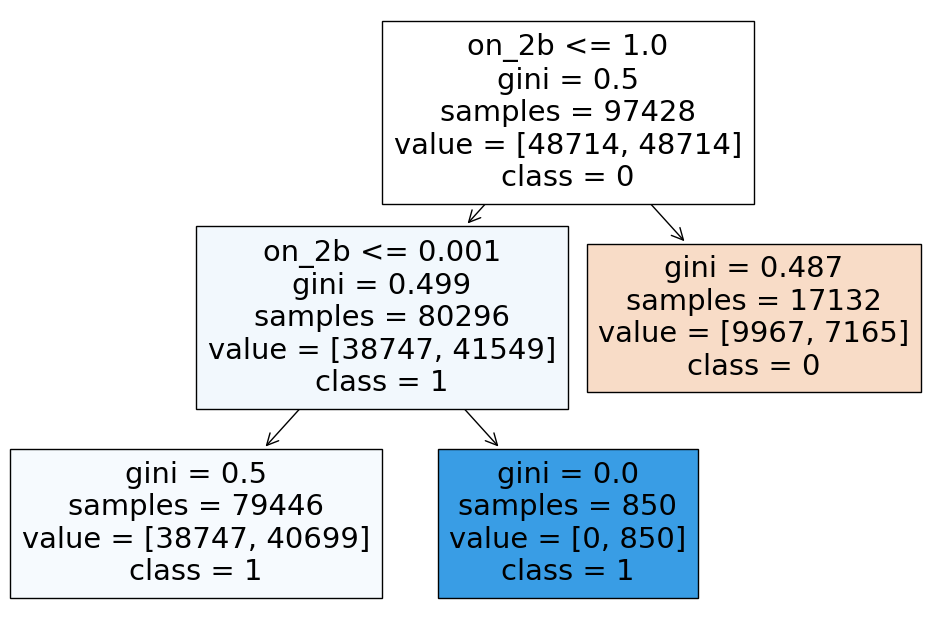

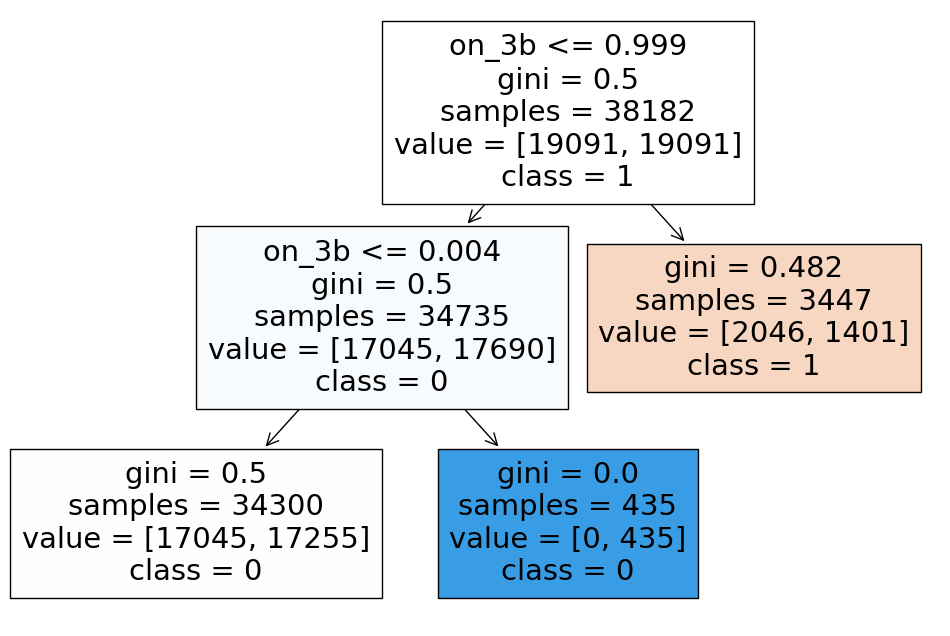

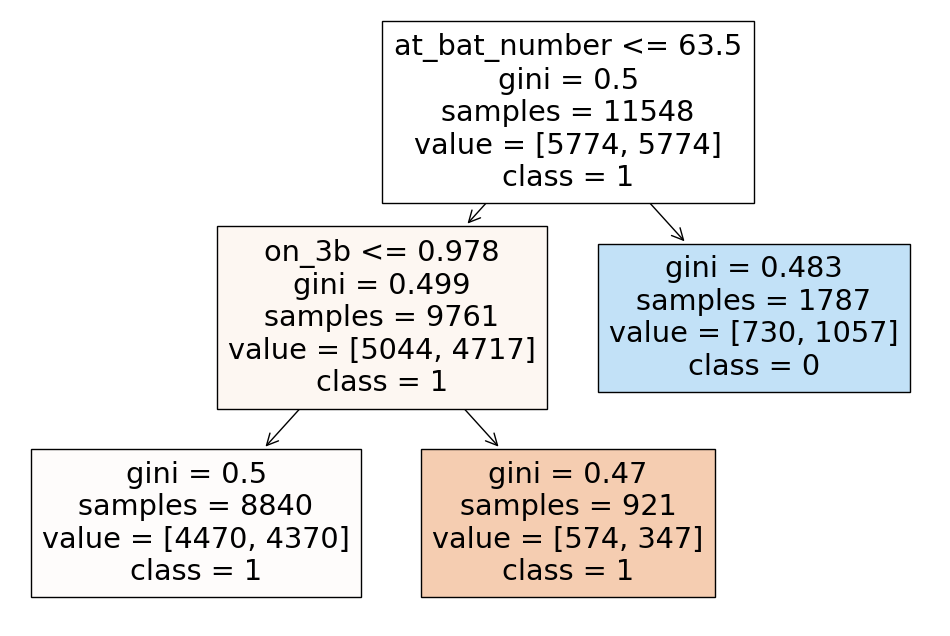

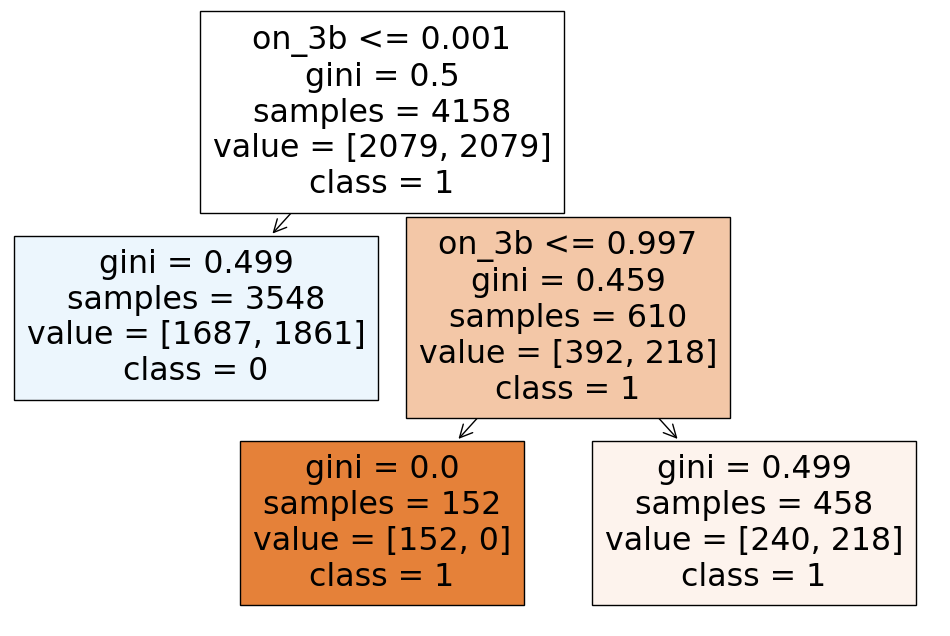

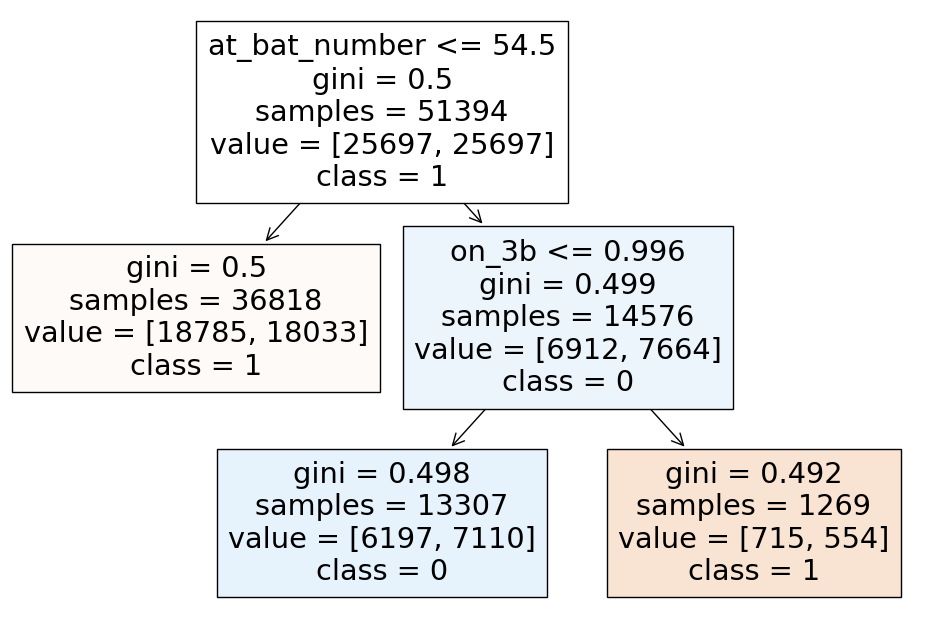

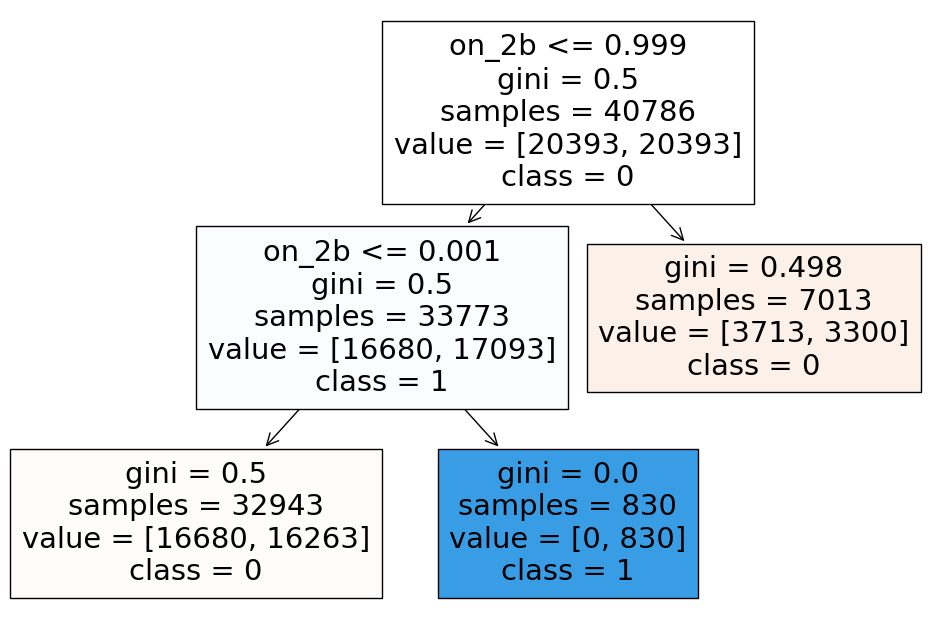

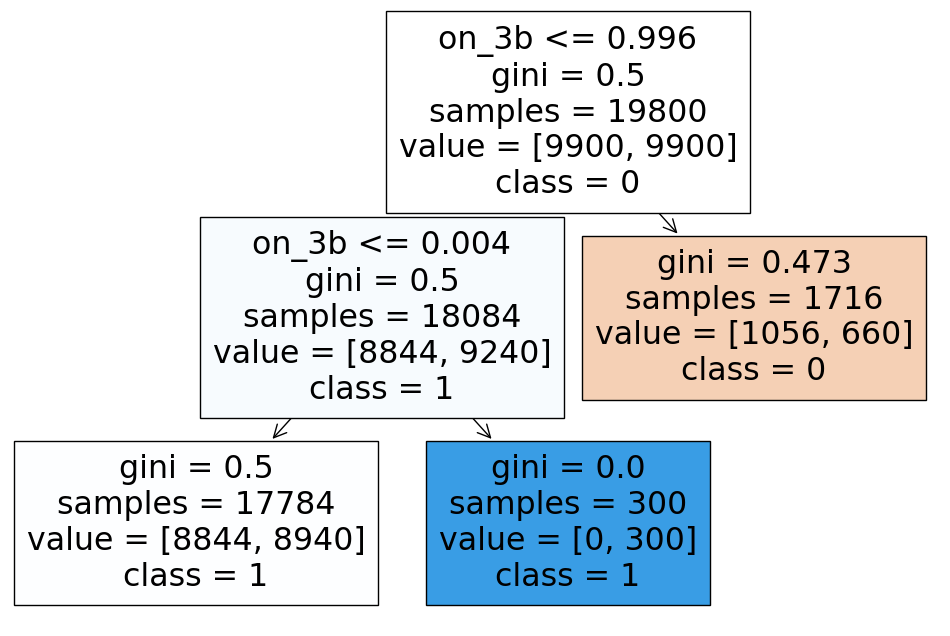

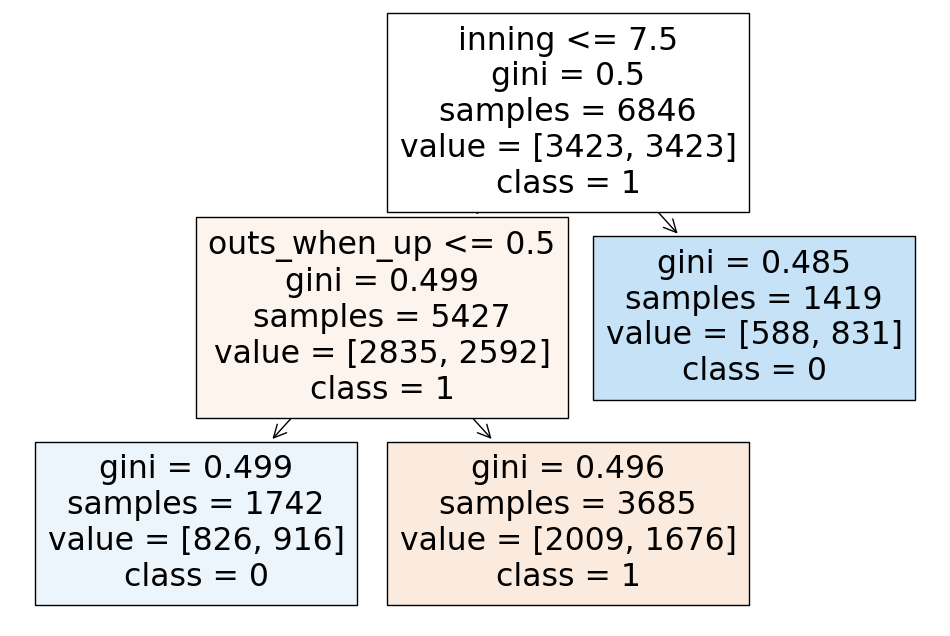

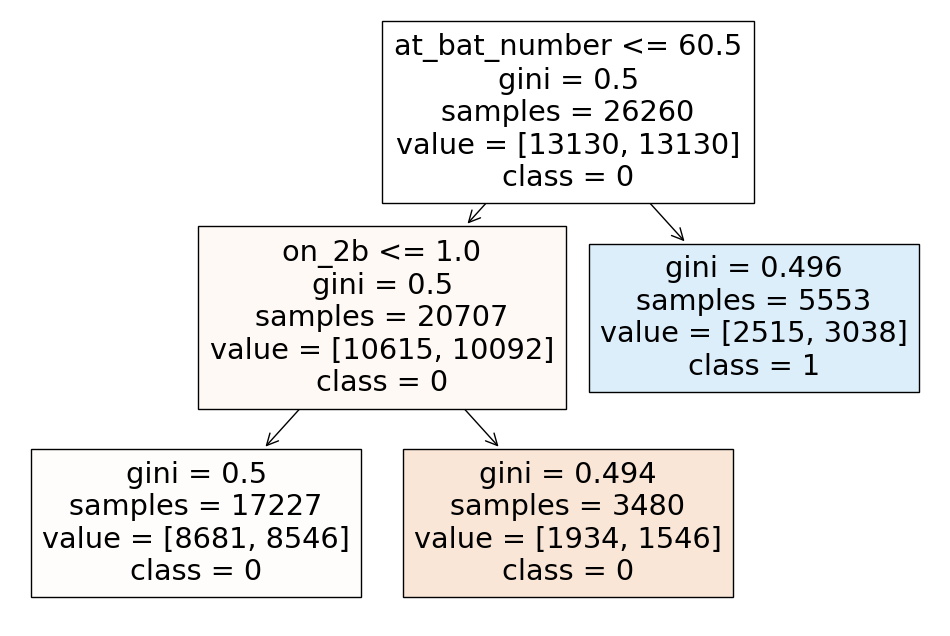

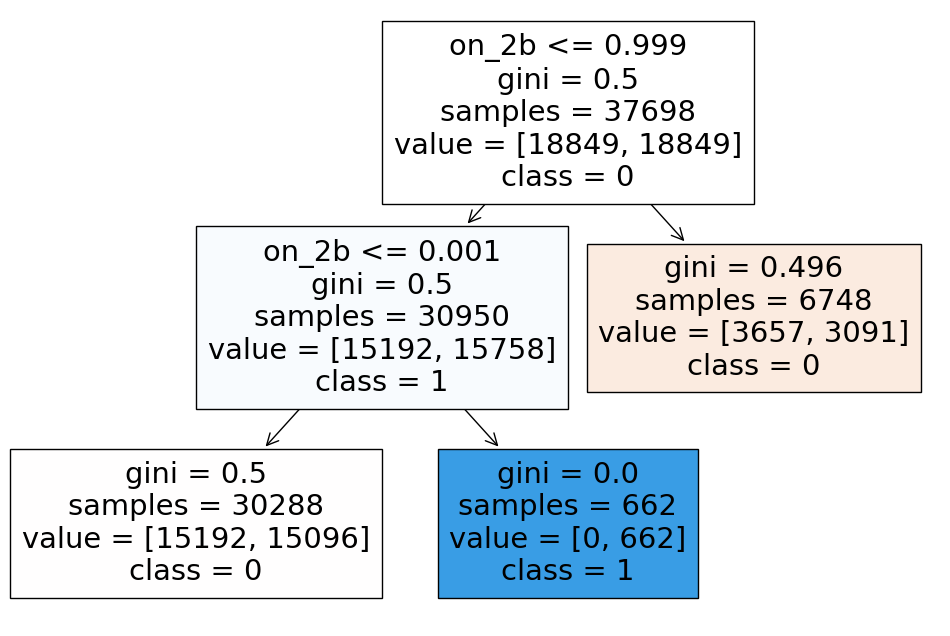

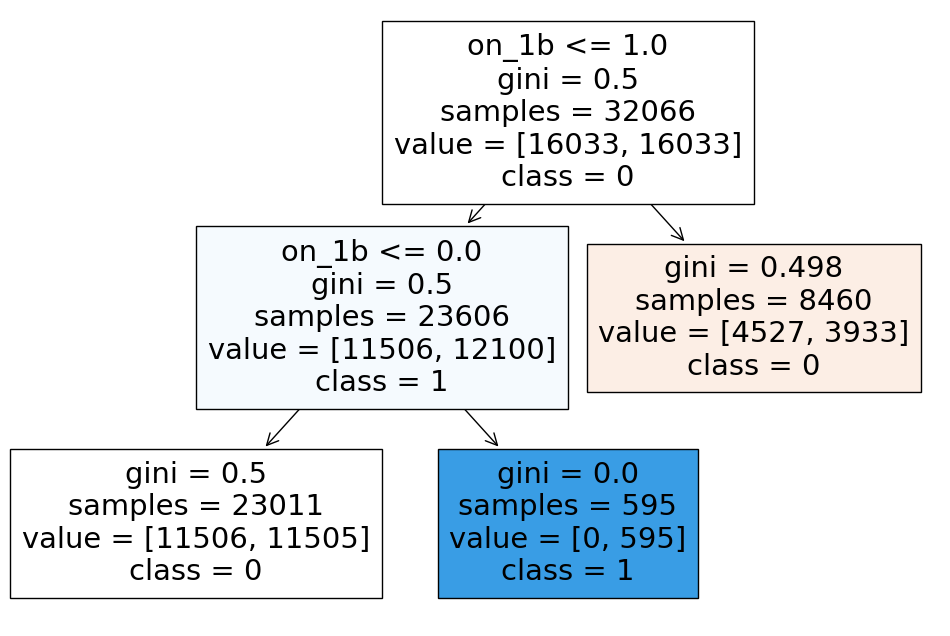

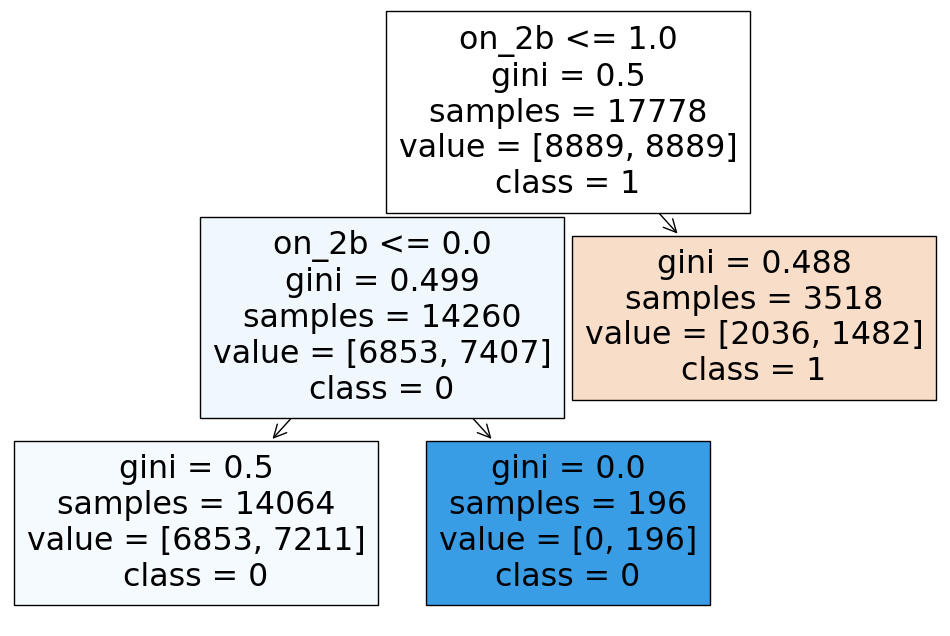

In [71]:
# 好像有"不平衡"的問題，所以run這裡會報警告訊息(不是報錯)

for i, each_dataset in enumerate(pd_df):
    print(all_counts[i])
    DecisionTree(each_dataset, 5, 100, 3, i) # argument: dataset, MaxDepth, MinSamplesSplit, MaxLeafNodes, i

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# 建模(model)、評估(assess)

def LogisticReg(dataset, i):
    data = copy.deepcopy(dataset)

    X = data.loc[:, ~data.columns.isin(['if_fastball'])]  # 选择除了最后一列之外的所有列作为特征
    y = data.loc[:, 'if_fastball']   # 选择最后一列作为目标变量

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 创建SMOTE对象，指定参数
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4, n_jobs=-1)

    # 进行SMOTE过采样
    X_train, y_train = smote.fit_resample(X_train, y_train)           # resampling

    # 初始化邏輯斯回歸模型
    model = LogisticRegression()
    
    # 使用交叉驗證進行預測
    predicted = cross_val_predict(model, X_train, y_train, cv=5)

    # 計算Accuracy, MCC (Matthews Correlation Coefficient), Confusion Matrix, Classification報告
    accuracy = accuracy_score(y_train, predicted)
    mcc = matthews_corrcoef(y_train, predicted)
    conf_matrix = confusion_matrix(y_train, predicted)
    classification_rep = classification_report(y_train, predicted)

    # 训练决策树模型
    model.fit(X_train, y_train)
    # 使用測試集進行預測
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy}")
    
    # 輸出模型的係數和截距
    coefficients = model.coef_
    intercept = model.intercept_
    
    # 寫入txt
    with open('LogisticReg結果(SMOTE).txt', 'a') as f:
        f.write('LogisticReg結果(%s)-SMOTE\n\n'%(str(all_counts[i])))
        f.write(f"Accuracy: {accuracy:.2f}\n\n")
        f.write(f"MCC: {mcc}\n\n")
        f.write(f'Confusion Matrix:\n{conf_matrix}\n\n')
        f.write(f'Classification Report:\n{classification_rep}\n\n')
        f.write(f'模型係數（Coefficients）：\n{coefficients}\n\n')
        f.write(f'截距（Intercept）：\n{intercept}\n\n')
        f.write("\n\n===============\n\n")

In [79]:
# 好像有"不平衡"的問題，所以run這裡會報警告訊息(不是報錯)
for i, each_dataset in enumerate(pd_df):
    print(all_counts[i])
    LogisticReg(each_dataset, i)

0-0
Test Accuracy: 0.5017178910544727
1-0
Test Accuracy: 0.5130233301374241
2-0
Test Accuracy: 0.544200187090739
3-0
Test Accuracy: 0.5542347696879644
0-1
Test Accuracy: 0.5227073140132982
1-1
Test Accuracy: 0.5140951322163106
2-1
Test Accuracy: 0.524473405061373
3-1
Test Accuracy: 0.5486086013733286
0-2
Test Accuracy: 0.5188690405773099
1-2
Test Accuracy: 0.5120950866326275
2-2
Test Accuracy: 0.5183887915936952
3-2
Test Accuracy: 0.5139754032902092


In [54]:
# pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
